In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import pandas as pd

from kmeans_pytorch import kmeans
#! pip install kmeans-pytorch

#### K-Means Clustering

In [2]:
def customer_clustering(customer_embed, num_clusters, name_path):
    data_size, dims = customer_embed.size(0), cust_embed.size(1)

    cluster_ids_x, cluster_centers = kmeans(
        X=customer_embed, num_clusters=num_clusters, distance='cosine', device=torch.device('cuda:1')) # 'euclidean', 'cosine'
    plt.bar(list(range(num_clusters)), pd.Series(cluster_ids_x.cpu().numpy()).value_counts().sort_index())
    pd.DataFrame({'Index_Customer': list(range(data_size)), 'Cluster': cluster_ids_x}).to_csv(name_path+'clustering.csv')
    return cluster_ids_x, cluster_centers

#### Count Purshase by Category and Count Purshase by Category

In [3]:
def distr_category(cluster_ids_x, data, name_path):
    clustering = pd.DataFrame(columns = ['head', 'cluster'])
    clustering['head'] = list(range(len(cluster_ids_x)))
    clustering['cluster'] = [str(int(i)) for i in cluster_ids_x]
    df = pd.merge(data, clustering, how='left', on='head')
    
    mean_cluster_category = pd.DataFrame(index = df['tail_type'].unique())

    for i in np.sort(df.cluster.unique()):
        temp = pd.Series(df[df.cluster == i]['tail_type'].value_counts().sort_index(), name=i)
        mean_cluster_category = pd.merge(mean_cluster_category, temp, left_index=True, right_index=True, how = 'left')
    
    display(mean_cluster_category)
    
    df2 = pd.Series(list(df['relation']), index=[df['cluster'], df['tail_type']])
    mean_cluster_amount = pd.DataFrame(index = df['tail_type'].unique())

    for i in np.sort(df.cluster.unique()):
        temp = pd.Series(df2[i].groupby('tail_type').sum().sort_index(), name=i)
        mean_cluster_amount = pd.merge(mean_cluster_amount, temp, left_index=True, right_index=True, how = 'left')
    
    mean_cluster_amount.loc['Total',:]= mean_cluster_amount.sum(axis=0)
    display(mean_cluster_amount)
    
    mean_cluster_category.to_csv(name_path + 'Count_purchase.csv')
    mean_cluster_amount.to_csv(name_path + 'Amount_purchase.csv')
    
    return mean_cluster_category, mean_cluster_amount

In [4]:
NUM_CLUSTERS = 10

running k-means on cuda:1..


[running kmeans]: 33it [00:00, 70.64it/s, center_shift=0.000000, iteration=33, tol=0.000100]


,0,1,2,3,4,5,6,7,8,9
Beauty,1493,1318,1797,1051,1804,1996,2097,966,1498,1921
"Clothes, Shoes",3527,3013,4268,3950,5075,4132,3065,3504,4063,4279
Fast Food,30742,30547,39527,24030,32005,41309,28970,23199,37926,32459
Fuel,6770,3657,6397,3940,7117,6327,4711,6604,8405,5541
"House, Repair",3811,3983,3203,2835,3620,3457,2186,2468,3660,3503
Miscellaneous Goods,9942,10360,9506,8078,7818,7639,7023,7815,9717,10948
Pharmacies,5989,6123,7512,5985,7799,7284,5547,5217,7435,7940
Restaurants,6987,7759,11700,7918,7662,10207,9410,6784,11549,10050
Supermarkets,92982,104653,94012,104283,93306,91371,83273,78579,111210,123087
Transport,13253,15586,16873,17004,18180,14857,15867,9106,17124,20918


,0,1,2,3,4,5,6,7,8,9
Beauty,1207021.84,1167689.98,2.205509e+06,995763.67,2.181238e+06,2.449477e+06,1819186.95,890998.15,1.740170e+06,1866079.32
"Clothes, Shoes",5039672.39,4557279.91,9.004628e+06,5300680.77,8.677383e+06,9.915543e+06,5274914.22,4845538.91,6.717506e+06,7344762.60
Fast Food,8217868.10,8192619.29,1.078293e+07,6510801.65,9.097905e+06,1.157657e+07,8069721.82,6750681.10,1.037554e+07,8841591.78
Fuel,9333628.00,2964361.51,6.226205e+06,3478142.43,6.539884e+06,6.862626e+06,5075807.14,5610707.76,7.394729e+06,5349671.30
"House, Repair",6620145.58,21497112.10,7.877794e+06,4702945.27,8.967944e+06,8.072311e+06,5610905.86,5615375.85,8.339918e+06,6228153.78
Miscellaneous Goods,4164231.60,4333349.42,5.585415e+06,4526612.81,6.543060e+06,6.471087e+06,4322274.51,4605350.30,6.168271e+06,6273816.68
Pharmacies,3186868.18,3389398.21,4.528080e+06,3027565.54,5.324962e+06,5.134215e+06,3366356.21,2686486.29,4.294910e+06,4660696.58
Restaurants,3492156.95,4166005.70,7.278767e+06,3265908.30,5.225992e+06,6.986552e+06,4719494.42,3782797.35,6.197863e+06,5000243.17
Supermarkets,37879612.34,37730522.71,4.490531e+07,42068977.71,4.717763e+07,4.653357e+07,33475246.95,32537876.04,5.454273e+07,48275500.15
Transport,1994909.20,2020242.89,2.450017e+06,2018824.45,1.979016e+06,1.911113e+06,1867213.12,1395363.72,2.402140e+06,2349768.86


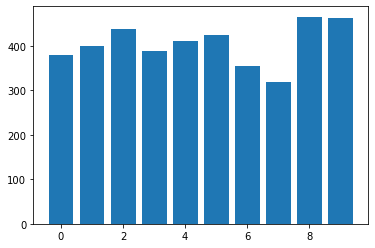

In [5]:
NAME_PATH = 'log//RES_100_1//ComplEx//'

model_complex = torch.load(NAME_PATH+'model.pt', map_location="cuda:1")
data = pd.read_csv ('data//df_100_1.csv')
cust_embed = model_complex['entity_embedding'][:max(data['head'])+1]


cluster_ids_x, cluster_centers = customer_clustering(cust_embed, NUM_CLUSTERS, NAME_PATH)
count_df, amount_df = distr_category(cluster_ids_x, data, NAME_PATH)

running k-means on cuda:1..


[running kmeans]: 40it [00:00, 92.81it/s, center_shift=0.000087, iteration=40, tol=0.000100]


,0,1,2,3,4,5,6,7,8,9
Beauty,1465,2181,1423,2086,1988,1174,1473,1387,1488,1276
"Clothes, Shoes",4548,4350,4861,5539,3772,3247,2857,2887,3176,3639
Fast Food,29729,35040,31279,44961,34677,31276,28433,28874,27447,28998
Fuel,7010,4355,8695,7222,4480,7180,3149,4708,5104,7566
"House, Repair",3806,3254,3933,3656,3109,3518,2119,4243,2069,3019
Miscellaneous Goods,8484,10038,9897,11252,9659,7533,7159,7781,7643,9400
Pharmacies,6769,7447,7182,9727,6770,5731,5388,5903,5476,6438
Restaurants,9172,10283,8727,10876,10362,7685,7740,8649,7453,9079
Supermarkets,90819,109913,116114,122239,109837,77646,77602,91536,86140,94910
Transport,13628,25980,16541,17650,19843,14830,16884,9554,12038,11820


,0,1,2,3,4,5,6,7,8,9
Beauty,1706289.50,2059325.21,1.570502e+06,2.401497e+06,1674297.50,1444571.42,1387247.40,1536595.73,1356341.10,1386467.31
"Clothes, Shoes",8472102.32,7212817.94,7.804239e+06,9.292891e+06,6315954.75,5997487.79,6389577.47,4829538.12,4764187.35,5599114.33
Fast Food,8749414.65,9564721.78,8.736413e+06,1.257081e+07,9146697.96,8726301.39,7691205.38,7944463.24,7363163.09,7923042.20
Fuel,6804817.11,4241662.61,7.810531e+06,6.995364e+06,3912871.27,6398268.14,2856526.99,4279154.73,4863915.36,10672651.96
"House, Repair",8494303.00,5948157.99,8.197284e+06,8.013173e+06,5677062.13,8572966.76,4633335.41,23199688.44,4519449.09,6277185.87
Miscellaneous Goods,5620314.85,5398799.75,6.710863e+06,7.976379e+06,4699472.95,4819128.15,4249414.42,4549329.73,3683385.58,5286379.87
Pharmacies,4084976.01,4223754.78,4.225487e+06,6.519302e+06,3503736.05,3676164.23,3504257.97,3391834.51,2981157.42,3488868.23
Restaurants,5819528.81,5102295.16,4.840345e+06,6.783182e+06,4899501.05,5338565.18,4490311.27,4248698.70,4002711.47,4590641.68
Supermarkets,46531008.94,44771054.27,5.251295e+07,5.761764e+07,43332609.06,37791234.66,32186780.35,37182700.65,31249117.72,41951890.56
Transport,2216705.01,2526526.30,2.092025e+06,2.342898e+06,2317441.22,1981154.04,1932472.43,1558360.20,1673491.20,1747535.16


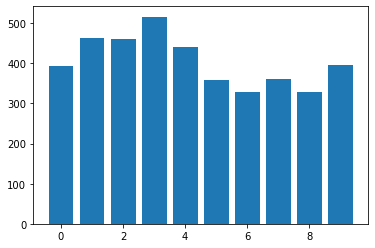

In [6]:
NAME_PATH = 'log//RES_100_1//DistMult//'

model_complex = torch.load(NAME_PATH+'model.pt', map_location="cuda:1")
data = pd.read_csv ('data//df_100_1.csv')
cust_embed = model_complex['entity_embedding'][:max(data['head'])+1]

cluster_ids_x, cluster_centers = customer_clustering(cust_embed, NUM_CLUSTERS, NAME_PATH)
count_df, amount_df = distr_category(cluster_ids_x, data, NAME_PATH)

running k-means on cuda:1..


[running kmeans]: 55it [00:00, 88.55it/s, center_shift=0.000000, iteration=55, tol=0.000100] 


,0,1,2,3,4,5,6,7,8,9
Beauty,1487,1545,1719,1236,1457,1617,1619,2175,1279,1807
"Clothes, Shoes",3808,4393,4330,3160,3208,4578,3643,4414,4180,3162
Fast Food,30833,33911,34245,28761,29566,33137,32172,35500,33095,29494
Fuel,5723,7476,5877,6478,4659,6631,5123,5790,6659,5053
"House, Repair",3034,3332,3059,2970,3163,3673,4522,3205,3148,2620
Miscellaneous Goods,9501,8633,8670,8234,7776,8690,8869,10623,9479,8371
Pharmacies,6676,6986,6446,6142,5891,6434,7699,7763,6380,6414
Restaurants,9039,8856,10355,8358,7274,9488,8742,9855,9794,8265
Supermarkets,101030,103025,99852,89018,96177,97744,95511,109333,90386,94680
Transport,15153,17307,16441,15168,15349,17364,16825,19857,13345,11959


,0,1,2,3,4,5,6,7,8,9
Beauty,1405697.45,2.066271e+06,1946717.94,1320442.63,1325107.98,1521971.76,1.744582e+06,2164542.19,1449403.83,1578397.76
"Clothes, Shoes",6222599.66,7.965779e+06,7347080.08,4755111.93,4923326.62,7299659.25,6.538993e+06,8390098.24,8036642.28,5198620.39
Fast Food,8610504.42,9.410227e+06,9962692.52,8081125.61,8021010.44,9205929.10,8.886888e+06,9651128.76,9064944.67,7521778.78
Fuel,9005267.34,7.349699e+06,5782395.47,5453886.04,4511972.58,6099079.25,4.867961e+06,5191244.49,6181493.00,4392764.62
"House, Repair",5879490.41,7.680573e+06,7723486.92,5601569.55,5667315.62,8922617.39,2.339229e+07,6440674.66,7367268.53,4857321.42
Miscellaneous Goods,5198123.98,6.120800e+06,6574396.63,4413640.20,4099962.28,5070981.48,5.465459e+06,6211673.05,5543196.76,4295233.32
Pharmacies,3732172.39,4.575217e+06,4031912.84,3567406.88,3323693.75,3788222.47,4.615925e+06,4633406.76,3560092.50,3771488.75
Restaurants,5691408.75,5.525227e+06,5948020.65,4524596.27,3933478.87,4858729.40,5.046340e+06,4807145.08,5404728.48,4376105.43
Supermarkets,41833094.06,4.899130e+07,48402360.61,37378091.88,37460424.77,43514489.41,4.175986e+07,46560913.13,40257742.30,38968713.77
Transport,2020597.10,2.134709e+06,2129398.03,1919097.80,1986824.07,2143940.63,2.101604e+06,2304029.14,1880485.44,1767923.29


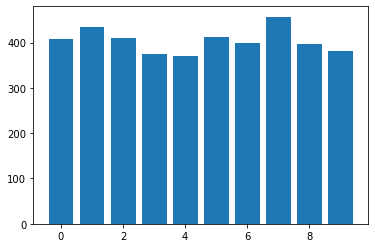

In [9]:
NAME_PATH = 'log//RES_100_1//RotatE//'

model_complex = torch.load(NAME_PATH+'model.pt', map_location="cuda:1")
data = pd.read_csv ('data//df_100_1.csv')
cust_embed = model_complex['entity_embedding'][:max(data['head'])+1]

cluster_ids_x, cluster_centers = customer_clustering(cust_embed, NUM_CLUSTERS, NAME_PATH)
count_df, amount_df = distr_category(cluster_ids_x, data, NAME_PATH)

running k-means on cuda:1..


[running kmeans]: 84it [00:00, 113.01it/s, center_shift=0.000082, iteration=84, tol=0.000100]


,0,1,2,3,4,5,6,7,8,9
Beauty,1360,1738,1953,1228,1673,1704,1870,1550,1578,1287
"Clothes, Shoes",3105,4069,4862,2992,4551,4194,3843,3854,3885,3521
Fast Food,26909,34408,36024,31564,33562,33596,26397,30976,32771,34507
Fuel,5282,5709,6564,6121,6588,5318,5353,6479,6207,5848
"House, Repair",3135,2891,4358,2680,3475,3240,3756,2913,3287,2991
Miscellaneous Goods,8294,9555,9624,7099,9920,9314,8550,8495,9390,8605
Pharmacies,5925,6766,7949,5407,7488,6746,6664,6382,7052,6452
Restaurants,7959,9158,9401,7780,10812,10644,9734,8223,9115,7200
Supermarkets,87151,101158,112335,90188,104020,89631,97636,94734,99107,100796
Transport,14681,19120,20045,15001,17730,17888,14522,12178,14426,13177


,0,1,2,3,4,5,6,7,8,9
Beauty,1431247.34,1853250.76,1.850866e+06,1486183.89,1717679.68,1940786.55,1583674.73,1575695.78,1624424.04,1459325.05
"Clothes, Shoes",5244051.05,7084098.92,8.515355e+06,4787472.84,7867421.57,7652416.58,5680037.96,6290509.15,7239235.24,6317310.92
Fast Food,7337781.12,9533973.06,1.017344e+07,8371570.66,9325985.98,9234437.45,7456152.09,8777874.29,9233963.47,8971049.85
Fuel,5059897.99,4977003.26,5.808771e+06,5628030.17,6127692.90,5421700.06,4784972.50,5803037.55,9774896.50,5449760.23
"House, Repair",8289789.02,5674285.59,1.363400e+07,5140834.08,7726893.07,8088924.18,16006530.61,5965733.62,7230221.28,5775395.77
Miscellaneous Goods,5638982.38,5803584.59,5.446052e+06,4816688.20,5693835.65,5107787.17,4459054.95,4706911.87,6268942.65,5051628.51
Pharmacies,3301853.61,4363847.75,4.669916e+06,3341039.31,4626797.19,3974989.15,4064549.28,3440581.23,4053189.47,3762775.42
Restaurants,4096605.72,5490970.37,5.539924e+06,4443681.79,5584998.36,5891087.40,4893942.13,5000349.03,5249182.10,3925039.00
Supermarkets,40756915.88,43947196.43,4.919964e+07,32919038.04,45417391.91,42961349.82,40390065.61,43411755.11,44739140.64,41384490.02
Transport,1799089.74,2213983.54,2.359635e+06,1821346.96,2180482.16,2071663.96,2044431.77,1826818.26,2083226.72,1987930.53


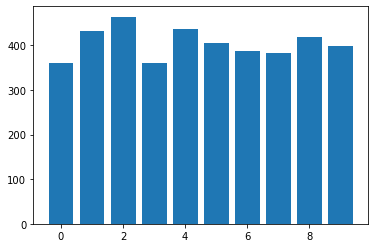

In [10]:
NAME_PATH = 'log//RES_100_1//TransE//'

model_complex = torch.load(NAME_PATH+'model.pt', map_location="cuda:1")
data = pd.read_csv ('data//df_100_1.csv')
cust_embed = model_complex['entity_embedding'][:max(data['head'])+1]

cluster_ids_x, cluster_centers = customer_clustering(cust_embed, NUM_CLUSTERS, NAME_PATH)
count_df, amount_df = distr_category(cluster_ids_x, data, NAME_PATH)